# 2A.ml - Problèmes classiques de machine learning illustrés

Revue des problèmes classiques de machines learning, classification, régression, ranking. Exercices sur la classification multi-classes.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu(last_level=3)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

Dans les exemples qui suivent :

* $e(X,Y)$ est une fonction d'erreur
* $\Theta$ et un jeu de coefficients
* $f(\Theta, X_i)$ la prédiction pour l'observation $i$, $\Theta$ représente les paramètres
* $(X_i, Y_i)$ est un jeu de données

**Note**

Les exemples suivants ne divisent pas les données en base d'apprentissage / base de test. Les modèles sont appris et testés sur les mêmes données ce qu'on ne fait jamais en pratique mais cela permet de voir précisément ce que le modèle apprend. La résolution des problèmes d'optimisation suppose que les données sont homogènes (elles suivent la même lois) et indépendantes.

## Supervisés

### Regression

In [3]:
add_notebook_menu(menu_id="reg", first_level=3, last_level=4, keep_item=0)

#### données 

$(X_i, Y_i)$, avec $X_i \in \mathbb{R}^n$ et $Y_i \in \mathbb{R}$.

#### sortie

$\hat{Y_i} \in \mathbb{R}$, $\hat{Y_i} = f(\Theta, X_i)$

#### optimisation

$$
\min_\Theta \sum_i e(Y_i, f(\Theta, X_i))
$$

Dans le cas standard, la fonction d'erreur est quadratique : $\min_\Theta \sum_i (Y_i - f(\Theta, X_i))^2$ et correspond au problème de modélisation $Y \sim f(\Theta, X_i) + \epsilon$ avec $\epsilon$ bruit gaussien.

#### évaluation

$$
r^2 = 1 - \frac{ \sum_i (Y_i - f(\Theta, X_i))^2 } { \sum_i (Y_i - \bar{Y})^2 } \leqslant 1 \text{ ou } 1 - \frac{ \sum_i e(Y_i, f(\Theta, X_i) } { \sum_i e(Y_i, \hat{Y}) }
$$

#### exemple

In [4]:
import numpy.random
X = numpy.random.random((100, 1))
xx = numpy.random.normal(size=(100, 1)) / 10
Y = X*X + xx

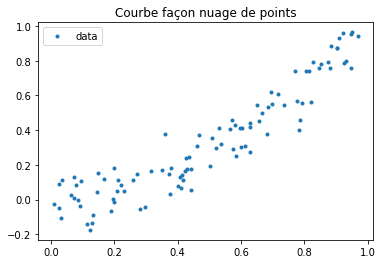

In [5]:
fig, ax = plt.subplots()
ax.plot(X, Y, ".", label="data")
ax.legend()
ax.set_title("Courbe façon nuage de points");

On compare deux modèles, une régression linéaire et un arbre de décision.

In [6]:
# model 1
from sklearn.linear_model import LinearRegression
clr = LinearRegression()
clr.fit(X, Y)
Yp = clr.predict(X)

In [7]:
# model 2
from sklearn.tree import DecisionTreeRegressor
clr2 = DecisionTreeRegressor(max_depth=4)
clr2.fit(X, Y)
Yp2 = clr2.predict(X)

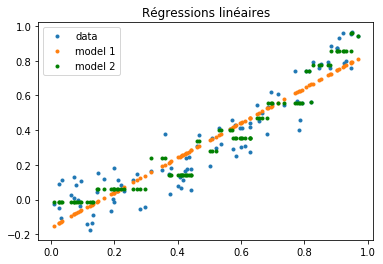

In [8]:
fig, ax = plt.subplots()
ax.plot(X, Y, ".", label="data")
ax.plot(X, Yp, ".", label="model 1")
ax.plot(X, Yp2, "g.", label="model 2")
ax.legend()
ax.set_title("Régressions linéaires");

#### graphe erreur XY

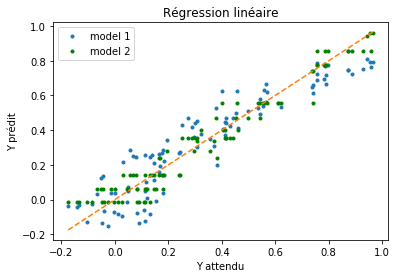

In [9]:
fig, ax = plt.subplots()
ax.plot(Y, Yp, ".", label="model 1")
ax.plot(Y, Yp2, "g.", label="model 2")
mm = [numpy.min(Y), numpy.max(Y)]
ax.plot(mm, mm,"--")
ax.set_xlabel("Y attendu")
ax.set_ylabel("Y prédit")
ax.legend()
ax.set_title("Régression linéaire");

Plus ce nuage est confondu avec la droite, plus il est performant. S'il y a trop de points, on peut trier les erreurs par ordre croissant :

In [10]:
err1 = ((Y - Yp)).reshape((len(Y),))
err1.sort()
err2 = ((Y - Yp2.reshape((len(Y), 1)))).reshape((len(Y),))
err2.sort()

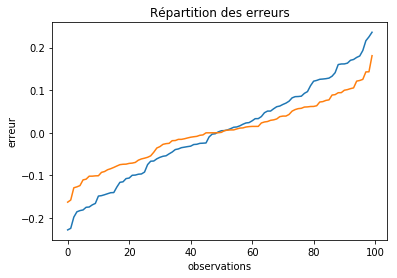

In [11]:
fig, ax = plt.subplots()
ax.plot(err1, label="model 1")
ax.plot(err2, label="model 2")
ax.set_xlabel("observations")
ax.set_ylabel("erreur")
ax.set_title("Répartition des erreurs");

L'erreur correspond alors à l'aire sous la courbe.

### Classification binaire

In [12]:
add_notebook_menu(menu_id="classif", first_level=3, last_level=4, keep_item=1)

#### données

$(X_i, Y_i)$, avec $X_i \in \mathbb{R}^n$ et $Y_i \in \{0,1\}$.

#### sortie

$(c_i, p_i^c)$ avec $c_i \in \{0,1\}$ la classe prédite et $p_i^c \in [0,1]$ la probabilité d'appartenance à la classe $c$ ou score de confiance. $p_i^1 = f(\Theta, X_i)$ et $p_i^0 = 1 - p_i^1$.

#### optimisation

Le problème d'optimisation dépend du modèle. On note $f(\Theta,X_i) =  P(Y=1 | X_i, \Theta)$, la probabilité que $X$ appartienne la la classe 1.

*régression logistique*

On optimise la vraisemblance déterminée par $\ln L(\Theta,X,Y) = \sum_i Y_i \ln f(\Theta,X_i) + (1-Y_i) \ln(1-f(\Theta,X_i))$.

*arbre*

On écrit rarement le critère à optimiser pour l'arbre dans sa totalité mais seulement pour une feuille de l'arbre qu'on cherche à découper. On optimise une métrique ([Gini](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity), [entropie](https://en.wikipedia.org/wiki/Decision_tree_learning#Information_gain), [variance](https://en.wikipedia.org/wiki/Decision_tree_learning#Variance_reduction)). Si on note $f(k)$ la proportion d'éléments bien classés par cette feuille. Le critère optimisé est : $-\sum_k f(k)\ln f(k)$.

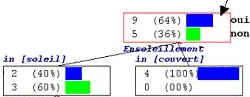

In [13]:
from pyquickhelper.helpgen import NbImage
NbImage("dt.png", width=600)

La pertinence de la division d'un noeud de l'arbre consiste à trouver un seuil de coupure pour une variable qui diminue le critère d'impureté $I$. Dans le cas de cette arbre :

$$\begin{array}{rcl}\Delta I &=& I(noeud \; parent) - I(noeud \; fils \; gauche) - I(noeud \; fils \; droit) \\ &=& - (0.64 \ln 0.64 + 0.36 \ln 0.36) + (0.4 \ln 0.4 + 0.6 \ln 0.6) + 0  \\ &=& -0.019 \end{array}$$

#### évaluation

* [matrice de confusion](https://fr.wikipedia.org/wiki/Matrice_de_confusion)
* [rappel, précision](https://fr.wikipedia.org/wiki/Pr%C3%A9cision_et_rappel), [F1](https://en.wikipedia.org/wiki/F1_score), [AUC](https://fr.wikipedia.org/wiki/Aire_sous_la_courbe)

#### exemple

In [14]:
import numpy.random
X = numpy.random.normal(size=(100, 2))
Y = numpy.random.randint(2, size=(100, ))
X[Y==1,0] += 1.2
X[Y==1,1] += 1.2

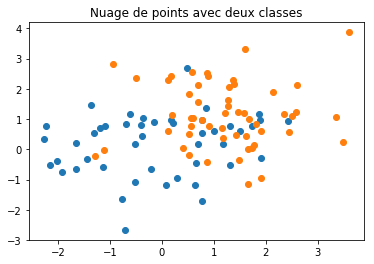

In [15]:
fix, ax = plt.subplots()
ax.plot(X[Y==0,0], X[Y==0,1], "o")
ax.plot(X[Y==1,0], X[Y==1,1], "o")
ax.set_title("Nuage de points avec deux classes");

In [16]:
# model 1
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X, Y)
Yp = clf.predict(X)

In [17]:
# model 1
from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier(max_depth=3)
clf2.fit(X, Y)
Yp2 = clf2.predict(X)

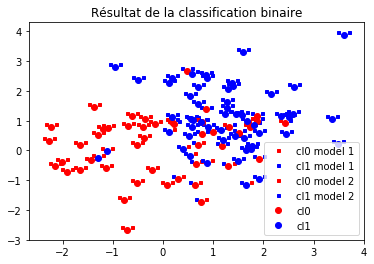

In [18]:
fig, ax = plt.subplots()
ax.plot(X[Yp==0,0]+0.1, X[Yp==0,1]+0.1, "rs", label="cl0 model 1", ms=3)
ax.plot(X[Yp==1,0]+0.1, X[Yp==1,1]+0.1, "bs", label="cl1 model 1", ms=3)
ax.plot(X[Yp2==0,0]-0.1, X[Yp2==0,1]+0.1, "rs", label="cl0 model 2", ms=3)
ax.plot(X[Yp2==1,0]-0.1, X[Yp2==1,1]+0.1, "bs", label="cl1 model 2", ms=3)
ax.plot(X[Y==0,0], X[Y==0,1], "ro", label="cl0")
ax.plot(X[Y==1,0], X[Y==1,1], "bo", label="cl1")
ax.legend()
ax.set_title("Résultat de la classification binaire");

### distribution des scores

In [19]:
from sklearn.metrics import roc_curve, auc

Ypr = clf.predict_proba(X)

In [20]:
score_pos = Ypr[Y == 1, 1]
score_neg = Ypr[Y == 0, 1]

In [21]:
import numpy
numpy.average(score_neg), numpy.average(score_pos)

(0.36854464309856544, 0.7010128988674563)

On utilise [seaborn](https://seaborn.github.io/).

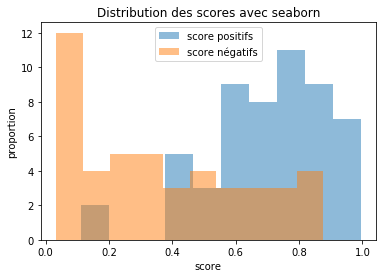

In [22]:
f, ax = plt.subplots()
ax.hist(score_pos, label="score positifs", alpha=0.5)
ax.hist(score_neg, label="score négatifs", alpha=0.5)
ax.set_xlabel("score")
ax.set_ylabel("proportion")
ax.legend()
ax.set_title("Distribution des scores avec seaborn");

#### graphe erreur ROC

[Courbe ROC](http://www.xavierdupre.fr/app/mlstatpy/helpsphinx/c_metric/roc.html)

In [23]:
from sklearn.metrics import roc_curve, auc

# model 1
Ypr = clf.predict_proba(X)
fpr, tpr, thresholds = roc_curve(Y, Ypr[:,1]) # on choisit la classe 1

In [24]:
# model 2
Ypr2 = clf2.predict_proba(X)
fpr2, tpr2, thresholds2 = roc_curve(Y, Ypr2[:,1]) # on choisit la classe 1

In [25]:
auc(fpr, tpr), auc(fpr2, tpr2)

(0.8337359098228664, 0.8836553945249597)

In [26]:
import pandas
df = pandas.DataFrame({"seuil":thresholds, "fpr":fpr, "tpr": tpr })[["seuil", "fpr", "tpr"]]
pandas.concat([df.head(), df.tail()])

,seuil,fpr,tpr
0,0.994020,0.000000,0.018519
1,0.878538,0.000000,0.203704
2,0.876186,0.021739,0.203704
3,0.844416,0.021739,0.277778
4,0.837452,0.043478,0.277778
28,0.166698,0.739130,0.962963
29,0.143926,0.739130,0.981481
30,0.111130,0.782609,0.981481
31,0.110802,0.782609,1.000000
32,0.032959,1.000000,1.000000


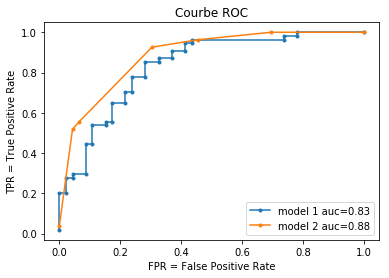

In [27]:
fix, ax = plt.subplots()
ax.plot(fpr, tpr, ".-", label="model 1 auc=%0.2f" % auc(fpr, tpr))
ax.plot(fpr2, tpr2, ".-", label="model 2 auc=%0.2f" % auc(fpr2, tpr2))
ax.set_xlabel("FPR = False Positive Rate")
ax.set_ylabel("TPR = True Positive Rate")
ax.legend()
ax.set_title("Courbe ROC");

La courbe ROC est définie par l'ensemble des points $(FPR(s), TPR(s))$ pour $s \in [0,1]$. Le score de classification désigne le score de la classe de classification dans la classe 1. Pour un seuil $s$, on note:

* $P(s)$ est l'ensemble des observations pour lesquelles le score de classification est supérieur à $s$ et la réponse attendue est 1
* $N(s)$ est l'ensemble des observations pour lesquelles le score de classification est supérieur à $s$ et la réponse attendue est 0
* $TP(s)$ est l'ensemble des observations pour lesquelles le score de classification est supérieur à $s$ et la prédiction est 1 et la classe attendue est 1
* $FN(s)$ est l'ensemble des observations pour lesquelles le score de classification est supérieur à $s$ et la prédiction est 0 et la classe attendue 0


$FPR(s) = \frac{ FN(s) }{ N(s)}$ et $TPR(s) = \frac{ TP(s) }{ P(s)}$


#### graphe frontière

Si le nombre de features est supérieur à 2, il faut appliquer une ACP pour réduire les dimmensions.

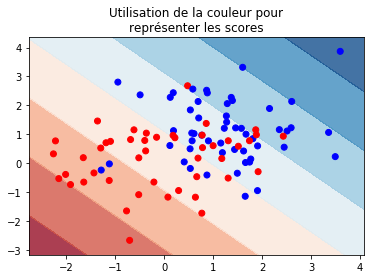

In [28]:
# nuage de points
from matplotlib.colors import ListedColormap
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

fig, ax = plt.subplots()

# grille
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, h),
                        numpy.arange(y_min, y_max, h))

# valeur pour cette grille
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(numpy.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(numpy.c_[xx.ravel(), yy.ravel()])[:, 1]

# 
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=cm_bright)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_title("Utilisation de la couleur pour\nreprésenter les scores");

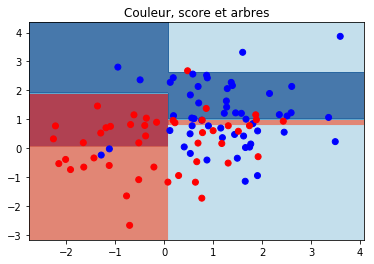

In [29]:
# nuage de points
from matplotlib.colors import ListedColormap
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

fig, ax = plt.subplots()

# grille
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, h),
                        numpy.arange(y_min, y_max, h))

# valeur pour cette grille
if hasattr(clf2, "decision_function"):
    Z = clf2.decision_function(numpy.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf2.predict_proba(numpy.c_[xx.ravel(), yy.ravel()])[:, 1]

# 
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=cm_bright)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_title("Couleur, score et arbres");

#### matrice de confusion

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, Yp)

array([[31, 15],
       [ 7, 47]], dtype=int64)

In [31]:
confusion_matrix(Y, Yp2)

array([[32, 14],
       [ 4, 50]], dtype=int64)

### Plusieurs dimensions

#### Régression 

$Y_i \in \mathbb{Y^p}$

Addition des erreurs sur les différentes dimensions

#### Classification

$Y_i \in E$ où $E$ est un ensemble sur lequel il n'y a pas de relation d'ordre.

On transforme le problème en plusieurs problèmes de classification binaire.

* [un contre tous](https://en.wikipedia.org/wiki/Multiclass_classification#One-vs.-rest)
* [un contre un](https://en.wikipedia.org/wiki/Multiclass_classification#One-vs.-rest)

### Ranking

In [33]:
add_notebook_menu(menu_id="rank", first_level=3, last_level=4, keep_item=3)

#### données

$(G_i, X_i, Y_i)$, avec $X_i \in \mathbb{R}$ et $Y_i \in \mathbb{N}$.

$G_i$ est un identifiant qui permet de regroupes les observations ensemble. Au sein d'un groupe, $Y_i$ détermine l'ordre dans lequel les observations doivent être triées.

#### sortie

$S_i$, ce score permet de trier les observations au sein d'un groupe.

#### optimisation

Deux approches :

* *score* : on émet l'hypothèse qu'il existe un score qui permet de trier les éléments entre eux, la connaissance du groupe $G_i$ est superflu, le problème de ranking devient un problème de régression où on cherche à apprendre le score.
* [pair-wise](https://en.wikipedia.org/wiki/Learning_to_rank#Pairwise_approach) : le score n'est pas connu, tout ce qu'on sait faire est d'exprimer une préférence entre les éléments $(G_i=g,X_i)$ et $(G_j=g,X_j)$. On transforme le problème le problème de ranking en un problème de classification binaire, pour chaque chaque pair d'oboservations au sein du même groupe, on aprend la préférence.

#### évaluation

corrélation entre les positions attendues et prédites au sein du même groupe d'observations

## Non supervisés

### Clustering

Principales différences entre algorithmes :

* espace veectoriel / espace métrique (distance uniquement)
* nombre de clusters fixés à l'avance ou déterminé en cours de route
* coût

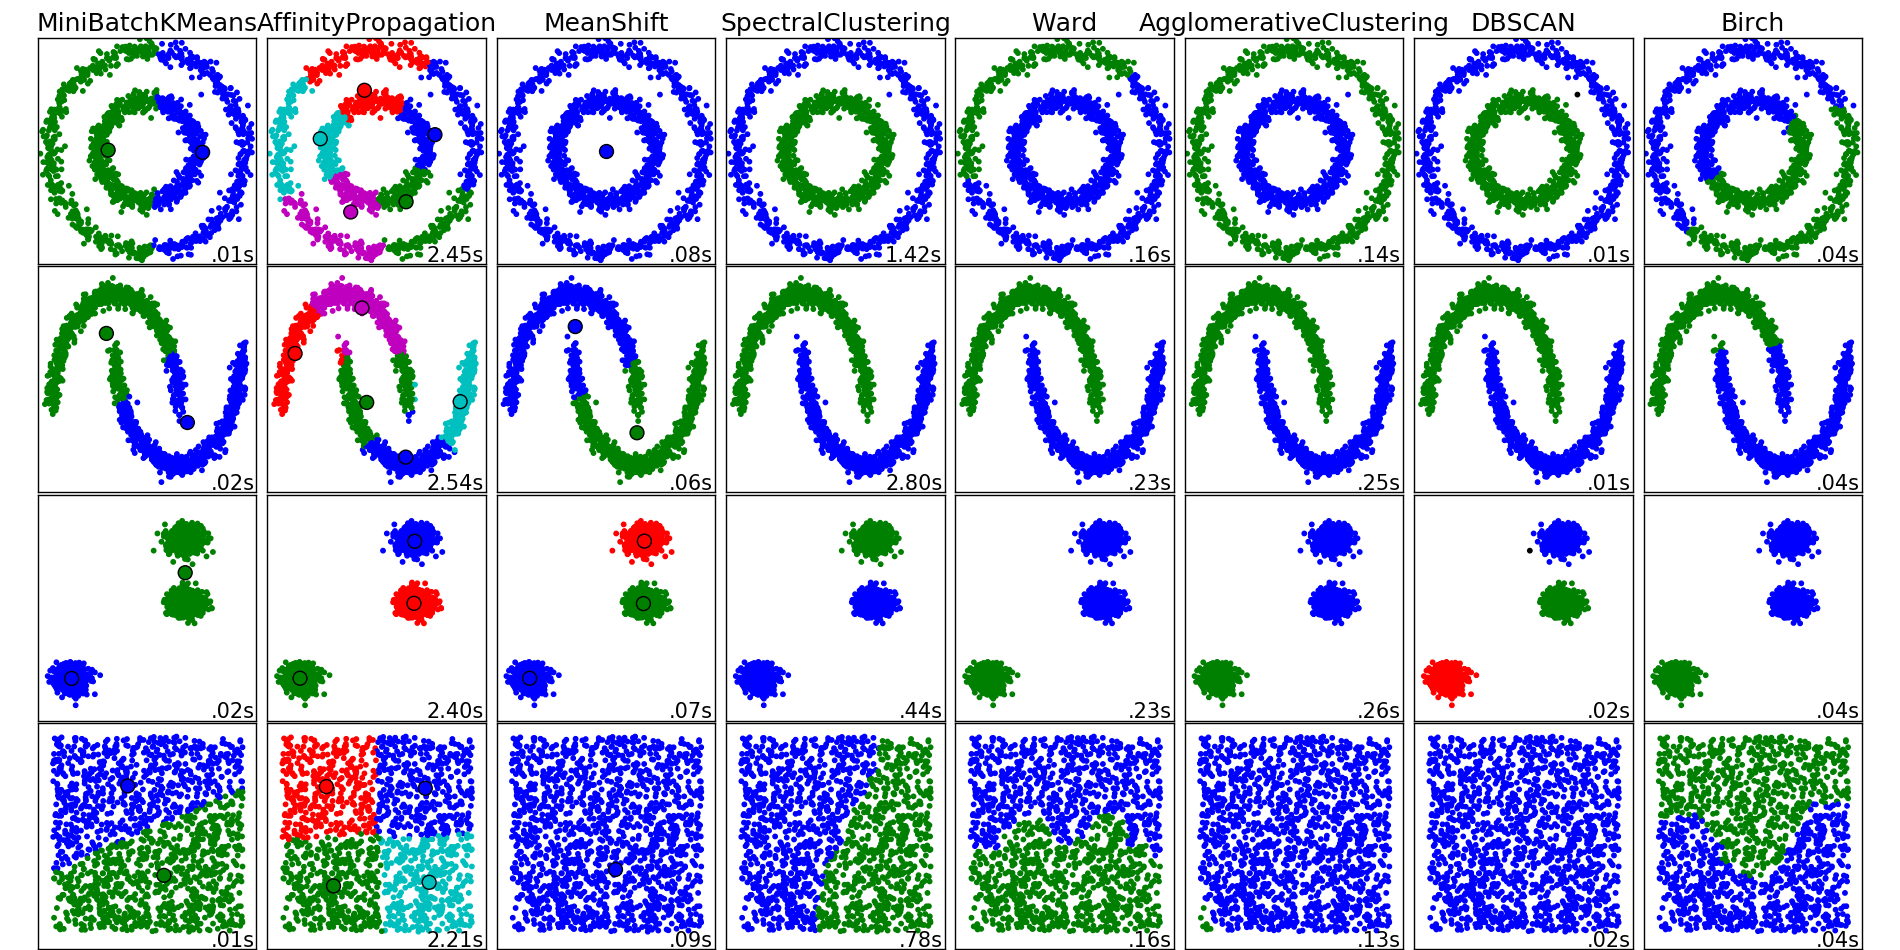

In [34]:
from pyquickhelper.helpgen import NbImage
NbImage("sphx_glr_plot_cluster_comparison_001.png")

### Réduction de dimensions


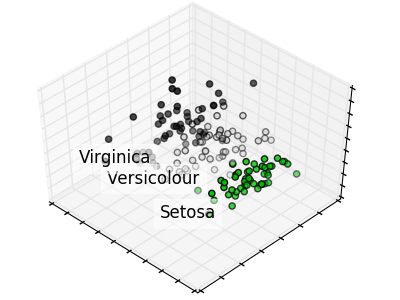

In [35]:
NbImage("sphx_glr_plot_pca_iris_001.png")

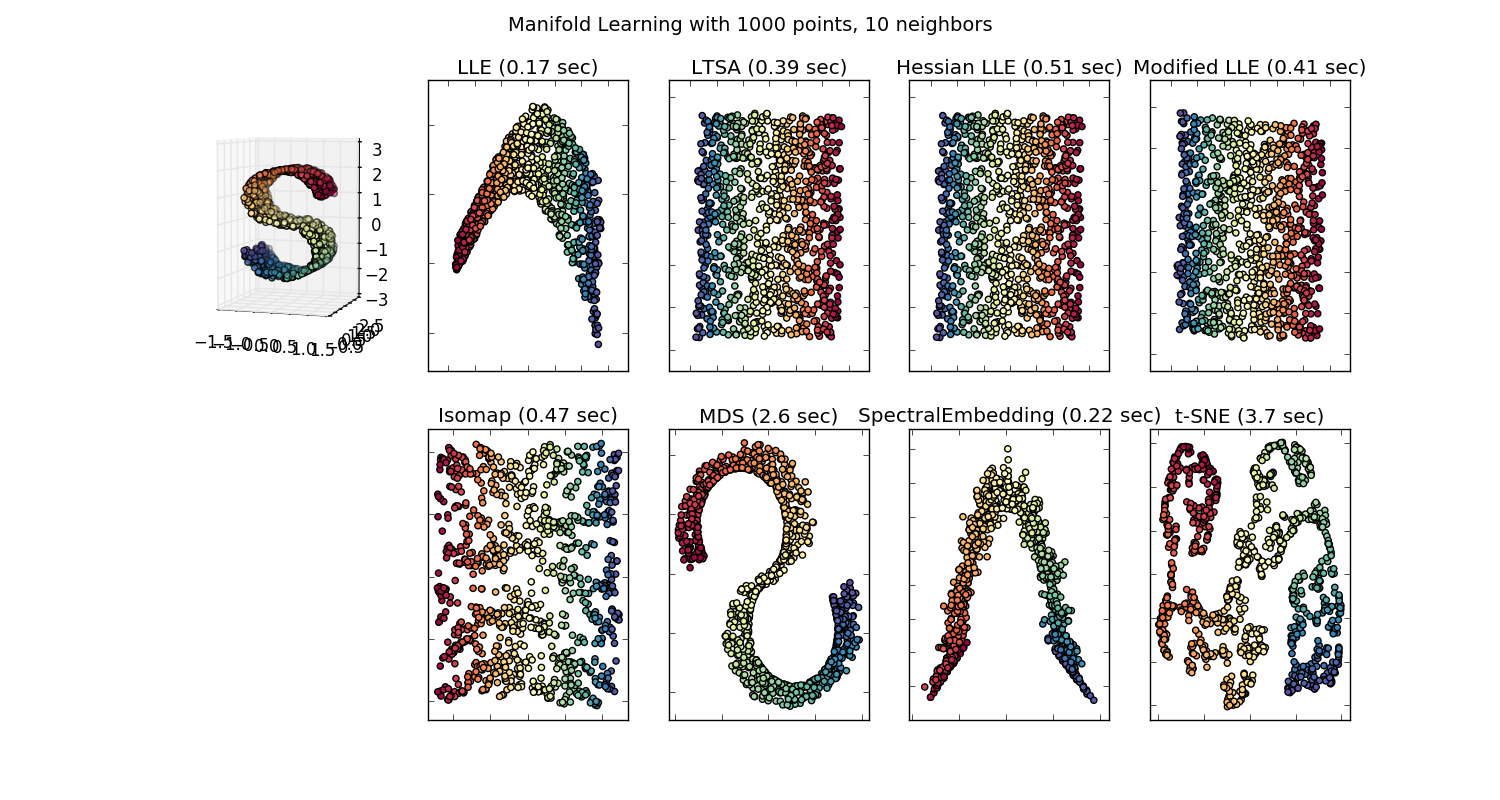

In [36]:
NbImage("sphx_glr_plot_compare_methods_001.png")

## Ridge / Lasso / Régularisation

Ces deux méthodes [Ridge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) et [Lasso](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) ont été développés pour ces modèles linéaires. On retrouve des idées similaires pour l'optimisation d'autres modèles en particulier [Ridge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) qui revient à ajouter une pénalité de régularisation des coefficients lors de l'apprentissage. C'est le cas du paramètre ``alpha`` qui apparaît lorsqu'on définit un [réseau de neurones](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) avec scikit-learn.


## Learner / Transformer / Pipeline

Le module scikit-learn fait apparaître le terme de *transformeur* : [StandardScaler](https://github.com/scikit-learn/scikit-learn/blob/412996f/sklearn/preprocessing/data.py#L449) est un *transformeur* (ou *transformer* en anglais). Ce type d'objet transforme les données mais ne produisent le résultat final. Un [Pipeline](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) empile une liste de transformeurs et un estimateur final (classifieur, régresseur). Une ACP est un transformeur car elle modifie les entrées $X$ avant un apprentissage. 

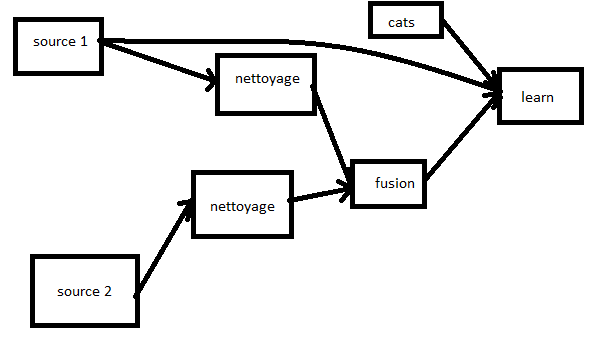

In [37]:
from pyquickhelper.helpgen import NbImage
NbImage("pipeline.png")

Un pipeline simple :

* [ACP](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
* [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [38]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
Y = data.target

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
pipe = Pipeline([("acp", PCA()),
                 ("logreg", LogisticRegression())])
pipe.fit(X, Y)

Pipeline(memory=None,
     steps=[('acp', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logreg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [40]:
pred = pipe.predict(X)
pred[:5]

array([0, 0, 0, 0, 0])

Lors de la prédiction, les variables passent par la même chaîne de traitement. Les méthodes pour les *transformer* et *estimator* sont différents :

* **estimator :** fit + predict
* **transformer :** fit (optionnel) + transform

La méthode *fit* ne s'applique pas à tous les transformers. Il n'y a pas toujours de coefficients à estimer. La plupart des *transformer* sont non supervisés (pas besoin de *Y*) mais certains le sont comme [t-SNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html).

## Exercice 1 : classifier avec plusieurs classes

La plupart des modèles ne savant pas gérer le cas multi-class, seulement le cas de la classification binaire.

* [One vs Rest](http://scikit-learn.org/stable/modules/multiclass.html#one-vs-the-rest)
* [One vs One](http://scikit-learn.org/stable/modules/multiclass.html#one-vs-one)
* Et si on transformait le label en une variable...

Il faut comparer ces trois approches.

## Exercice 2 : grand nombre de classes ?

Pourquoi un grand nombre de classes aboutit-il nécessairement à un cas de jeu de données *imbalanced* ? Que proposez-vous pour y remédier ?

## Exercice 3 : ranking

Résoudre un problème de ranking.